In [6]:
%%capture

###############################################
###############################################
# Setup
# This chuck ingests pre-computed variables
###############################################
###############################################

# [Shift + Return] to run chunks 

###############################################

# settings
wkdir, s3dir = '/home/ubuntu/data/DL20181011_melanocyte_test_data', 'daniel.le-work/MEL_project'

%reload_ext autoreload
%autoreload 2
from scanpy_helpers_1 import *
from scanpy_helpers_2 import *
warnings.filterwarnings('ignore')
%matplotlib inline

# import data from s3
for file in ['full_adata', 'DE_df', 'raw_adata'
            ]:
#     ! aws s3 cp s3://{s3dir}/{file}.p {wkdir}/
    var = pickle.load((open(f'{wkdir}/{file}.p', 'rb')))
    exec(f'{file} = var')
    del var
    
usable_cores = multiprocessing.cpu_count()-1

# update subtypes
full_adata.obs['subtypes'] = ['follicular' if x in ['light_foll_mel', 'dark_foll_mel', 'cyc_foll_mel'] \
                         else y \
                         for x,y in zip(full_adata.obs.class_1, full_adata.obs.subtypes)]

# label order
dev_stage_order = ['fet','neo','adt']
subtypes_order = ['cutaneous','acral','foreskin','follicular']
acral_subtype_order = ['acral','not_acral']
foreskin_subtype_order = ['foreskin','not_foreskin']
follicular_subtype_order = ['follicular','not_follicular']
dev_subtype_order = ['fet_acral','fet_cutaneous','fet_follicular','neo_foreskin','adt_acral','adt_cutaneous']

# create class_2 for site granularity
full_adata.obs['class_2'] = [x if x not in ['mel'] \
                             else f'{y}_mel'
                             for x,y in zip(full_adata.obs['class_1'], full_adata.obs['subtypes'])]

# create class_3 for site+dev_stage granularity
full_adata.obs['class_3'] = [x if not x.endswith('_mel') or x.startswith('cyc_') \
                             else f'{y}_{x}'
                             for x,y in zip(full_adata.obs['class_2'], full_adata.obs['dev_stage'])]

# update class_1 to pool by cell type
full_adata.obs['class_1'] = [x if not x.endswith('_mel') \
                             else 'mel' if not x.startswith('cyc_') \
                             else 'cyc_mel' \
                             for x in full_adata.obs['class_1']]
type_order_1 = ['mel',
                'cyc_mel',
                'krt',
                'cyc_krt',
                'eccrine',
                'cyc_eccrine',
                'dendritic',
                'cyc_dendritic',
                'mast',
                'T_cell',]
    
DE_df['class_1'] = (DE_df['class_1']
                      .astype(str)
                      .astype(CategoricalDtype(type_order_1, ordered=True))
                     )
DE_df = DE_df.dropna()

type_order_2 = ['cutaneous_mel',
                'acral_mel',
                'foreskin_mel',
                'dark_foll_mel',
                'light_foll_mel',
                'cyc_mel',
                'cyc_foll_mel',
                'krt',
                'cyc_krt',
                'eccrine',
                'cyc_eccrine',
                'dendritic',
                'cyc_dendritic',
                'mast',
                'T_cell',]

type_order_3 = ['adt_cutaneous_mel',
                'adt_acral_mel',
                'neo_foreskin_mel',
                'fet_cutaneous_mel',
                'fet_acral_mel',
                'fet_dark_foll_mel',
                'fet_light_foll_mel',
                'cyc_mel',
                'cyc_foll_mel',
                'krt',
                'cyc_krt',
                'eccrine',
                'cyc_eccrine',
                'dendritic',
                'cyc_dendritic',
                'mast',
                'T_cell',]


In [2]:
# # DE test
# print('computing...')
# gene_n = 100
# target_set = ['adt_acral_mel']
# ref_set = ['adt_cutaneous_mel']
# source_groupby = 'class_3'
# input_adata = full_adata

# input_adata = input_adata[[x in target_set+ref_set for x in input_adata.obs[source_groupby]]]
# input_adata.obs['DE_grouping'] = ['target' if x in target_set \
#                             else 'ref' \
#                             for x in input_adata.obs[source_groupby]]

# genelist_adt_acral = fast_DE(input_adata, clusterOI='target', groupby='DE_grouping', reference='ref', gene_n=gene_n)
# genelist_adt_cut = fast_DE(input_adata, clusterOI='ref', groupby='DE_grouping', reference='target', gene_n=gene_n)


In [3]:
# # DE test
# print('computing...')
# gene_n = 100
# target_set = ['fet_acral_mel']
# ref_set = ['fet_cutaneous_mel']
# source_groupby = 'class_3'
# input_adata = full_adata

# input_adata = input_adata[[x in target_set+ref_set for x in input_adata.obs[source_groupby]]]
# input_adata.obs['DE_grouping'] = ['target' if x in target_set \
#                             else 'ref' \
#                             for x in input_adata.obs[source_groupby]]

# genelist_fet_acral = fast_DE(input_adata, clusterOI='target', groupby='DE_grouping', reference='ref', gene_n=gene_n)
# genelist_fet_cut = fast_DE(input_adata, clusterOI='ref', groupby='DE_grouping', reference='target', gene_n=gene_n)


In [4]:
# df = pd.DataFrame({'adt_acral>adt_cut':genelist_adt_acral,
#                    'adt_cut>adt_acral':genelist_adt_cut,
#                    'fet_acral>fet_cut':genelist_fet_acral,
#                    'fet_cut>fet_acral':genelist_fet_cut,
#                   })
# df.to_csv('/home/ubuntu/data/DL20181011_melanocyte_test_data/DE_forRob.csv')

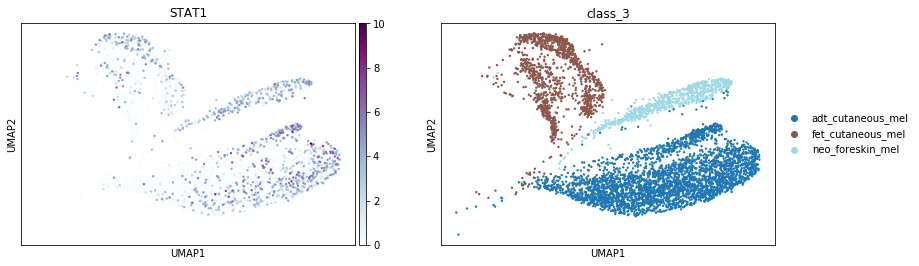

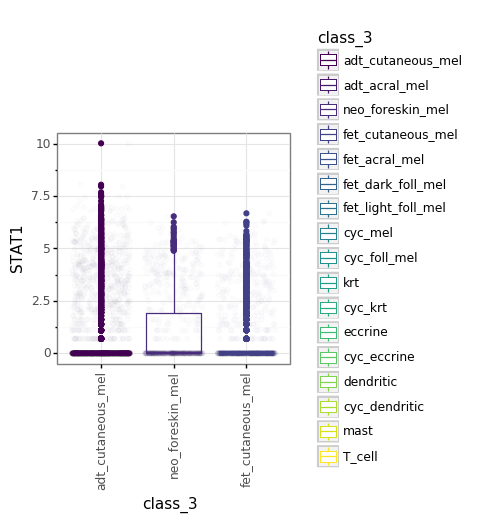

<ggplot: (8772056795926)>
querying 1-1...done.
Finished.
0:  STAT1 
 The protein encoded by this gene is a member of the STAT protein family. In response to cytokines and growth factors, STAT family members are phosphorylated by the receptor associated kinases, and then form homo- or heterodimers that translocate to the cell nucleus where they act as transcription activators. This protein can be activated by various ligands including interferon-alpha, interferon-gamma, EGF, PDGF and IL6. This protein mediates the expression of a variety of genes, which is thought to be important for cell viability in response to different cell stimuli and pathogens. Two alternatively spliced transcript variants encoding distinct isoforms have been described. [provided by RefSeq, Jul 2008].


In [47]:
# look up gene
gene = 'STAT1'
groupby = 'class_3'
#input_adata = full_adata

### fsk analysis ###
type_order = ['fet_cutaneous_mel','neo_foreskin_mel', 'adt_cutaneous_mel'] 
input_adata = full_adata[[x in type_order for x in full_adata.obs[groupby]]]
###

sc.pl.umap(input_adata, color = [gene,groupby], cmap='BuPu', palette = 'tab20')

cat, plot_df = prepare_dataframe(input_adata[[not x.startswith('cyc') \
                                              for x in input_adata.obs[groupby]]],
                            gene,
                            groupby
                           )

plot_df = plot_df.reset_index()
if groupby == 'class_3':
    plot_df[groupby] = (plot_df[groupby]
                       .astype(str)
                        .astype(CategoricalDtype(type_order_3,ordered=True))
                       )
plot_df = plot_df.dropna()

plotnine.options.figure_size = (3,3)
plot = (ggplot(plot_df)
          + theme_bw()
          + theme(axis_text_x = element_text(angle = 90))
          + geom_boxplot(aes(groupby, gene, color = groupby))
          + geom_jitter(aes(groupby, gene, color = groupby), alpha = 0.01)
         )
print(plot)

out = symbol2field(gene)
output = [print(f'{idx}: ', 
       x['query'],
       '\n',x['summary']) if ('summary' in x.keys()) else print(f'{idx}: ', 
                                                                x['query'],
                                                                '\n','N/A') for idx, x in enumerate(out)]


In [36]:
# run this to download plot

fn = 'lookup_boxplot_S100b.pdf'
local_dest = f'/home/ubuntu/data/DL20181011_melanocyte_test_data/test_prints/{fn}'
ggsave(plot, local_dest)
s3_dest = 'daniel.le-work/MEL_project/plot_prints/test_prints/'
! aws s3 cp {local_dest} s3://{s3_dest}
! rm local_dest
print('\n', 'download here:', f'https://s3-us-west-2.amazonaws.com/{s3_dest}{fn}')

upload: ../../data/DL20181011_melanocyte_test_data/test_prints/lookup_boxplot_S100b.pdf to s3://daniel.le-work/MEL_project/plot_prints/test_prints/lookup_boxplot_S100b.pdf
rm: cannot remove 'local_dest': No such file or directory

 download here: https://s3-us-west-2.amazonaws.com/daniel.le-work/MEL_project/plot_prints/test_prints/lookup_boxplot_S100b.pdf


In [37]:
print('computing...')
## NTRK2/HPGD look-up
input_adata = full_adata
print(set(input_adata.obs.class_2))
groupby_1 = 'class_2'
groupby_2 = 'patient'

cat, df = prepare_dataframe(input_adata,
                           ['NTRK2','ERBB3'],
                           'cell')
df[groupby_1] = input_adata.obs[groupby_1].values
df[groupby_2] = input_adata.obs[groupby_2].values

# filter on acral vs cutaneous
df = df[[x in ['acral_mel','cutaneous_mel',] for x in df[groupby_1]]]
df.groupby([groupby_1,groupby_2]).mean().dropna().reset_index()

computing...
{'cutaneous_mel', 'dendritic', 'cyc_eccrine', 'light_foll_mel', 'cyc_foll_mel', 'foreskin_mel', 'krt', 'T_cell', 'acral_mel', 'dark_foll_mel', 'mast', 'cyc_dendritic', 'eccrine', 'cyc_mel', 'cyc_krt'}


,class_2,patient,NTRK2,ERBB3
0,acral_mel,10WK03,1.805200,3.483235
1,acral_mel,12WK05,3.936502,4.406474
2,acral_mel,12WKM01,2.381269,3.665097
3,acral_mel,16WKM04,2.301708,3.011860
4,acral_mel,18WKM06,2.213098,3.867733
5,acral_mel,A1038LM,2.166930,2.286014
6,acral_mel,A1046M,2.352038,3.252002
7,cutaneous_mel,9.5WK02,0.842467,3.959283
8,cutaneous_mel,10WK03,0.117757,2.801710
9,cutaneous_mel,12WK05,1.144042,4.256868


In [38]:
input_adata

AnnData object with n_obs × n_vars = 10119 × 24572 
    obs: 'age', 'age_bin', 'plate', 'general_location', 'anatomical_location', 'race', 'sex', 'color', 'patient', 'n_genes', 'n_counts', 'cell', 'cycling_score', 'cycling_cell', 'bsc', 'fsc', 'gate_label', 'contam_1', 'contam_2', 'louvain', 'named_cluster', 'true_year', 'dev_stage', 'subtypes', 'acral_subtype', 'dev_subtype', 'class_1', 'class_2', 'class_3'
    var: 'ribo', 'ercc', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'louvain', 'louvain_colors', 'named_cluster_colors', 'class_1_colors', 'rank_genes_groups', 'class_3_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

computing...


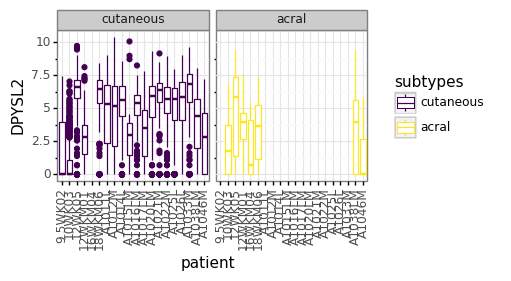

<ggplot: (8772058026209)>


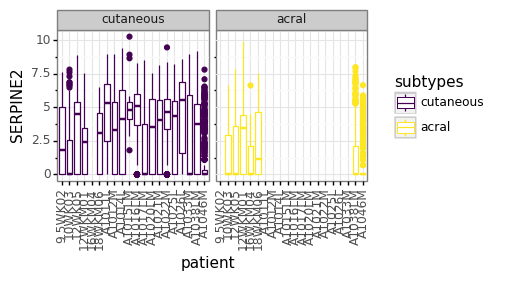

<ggplot: (8772056966653)>


In [3]:
print('computing...')


# gene correlation to bsc
genes = [
'DPYSL2','SERPINE2',
]

input_adata = full_adata[full_adata.obs.class_1 == 'mel']
plot_df = pd.DataFrame(input_adata.obs.groupby(['patient','subtypes'])['bsc'].mean()).reset_index()
plot_df = plot_df[[x in ['acral','cutaneous'] for x in plot_df.subtypes]]

# determine samples with acral and cutaneous
filter_df = pd.DataFrame(plot_df['patient'].value_counts())
filter_df = filter_df[filter_df['patient'] > 1]
filter_list = filter_df.index.tolist()

input_adata = full_adata[full_adata.obs.class_1 == 'mel']
input_adata = input_adata[[x in filter_list for x in input_adata.obs.patient]]

for goi in genes:
    cat, df = prepare_dataframe(input_adata,
                                goi,
                                'patient'
                               )
    df = df.reset_index()
    df['subtypes'] = input_adata.obs.subtypes.tolist() 
    df['subtypes'] = (df['subtypes']
                      .astype(str)
                      .astype(CategoricalDtype(['cutaneous','acral'], ordered = True))
                     )
    df = df.dropna()
    plotnine.options.figure_size = (4,4)
    plot = (ggplot(df)
            + theme_bw()
            + theme(axis_text_x = element_text(angle = 90),
                    aspect_ratio = 1)
            + geom_boxplot(aes('patient',goi,color='subtypes'))
            + facet_wrap('~subtypes', ncol = 6)
           )
    print(plot)

In [39]:
# see available groups based on grouping feature
grouping_features = ['class_1', 'class_2', 'class_3'] 
for grouping_feature in grouping_features:
    print(grouping_feature)
    display(set(full_adata.obs[grouping_feature]))

class_1


{'T_cell',
 'cyc_dendritic',
 'cyc_eccrine',
 'cyc_krt',
 'cyc_mel',
 'dendritic',
 'eccrine',
 'krt',
 'mast',
 'mel'}

class_2


{'T_cell',
 'acral_mel',
 'cutaneous_mel',
 'cyc_dendritic',
 'cyc_eccrine',
 'cyc_foll_mel',
 'cyc_krt',
 'cyc_mel',
 'dark_foll_mel',
 'dendritic',
 'eccrine',
 'foreskin_mel',
 'krt',
 'light_foll_mel',
 'mast'}

class_3


{'T_cell',
 'adt_acral_mel',
 'adt_cutaneous_mel',
 'cyc_dendritic',
 'cyc_eccrine',
 'cyc_foll_mel',
 'cyc_krt',
 'cyc_mel',
 'dendritic',
 'eccrine',
 'fet_acral_mel',
 'fet_cutaneous_mel',
 'fet_dark_foll_mel',
 'fet_light_foll_mel',
 'krt',
 'mast',
 'neo_foreskin_mel'}

In [13]:
input_adata = full_adata
clusterOI = 'fet_acral_mel' # select group of interest
groupby = 'class_3' # select grouping feature
reference = 'fet_cutaneous_mel' # select group for comparison (ie clusterOI > reference) or "rest" to compare to sum of all other features
n_genes = 20# number of top DE genes to print
sc.tl.rank_genes_groups(input_adata, 
                        groupby=groupby, 
                        groups=[clusterOI], 
                        method='wilcoxon',
                        reference=reference,
                        n_genes = n_genes)
genes = [x[0] for x in input_adata.uns['rank_genes_groups']['names']]
pvals = [x[0] for x in input_adata.uns['rank_genes_groups']['pvals']]

# pvals are uncorrected
display(pd.DataFrame({'gene':genes, 'pvals':pvals}))


,gene,pvals
0,ID3,1.233505e-100
1,ID2,3.856501e-97
2,IGDCC4,1.965023e-79
3,NTRK2,6.402643e-74
4,RAB3B,1.400937e-64
5,UACA,1.845040e-63
6,EIF5AL1,9.407859e-62
7,RUNX3,1.783699e-52
8,PHACTR3,3.896722e-50
9,PDLIM3,1.193345e-46


# acral vs cutaneous heatmap

computing...


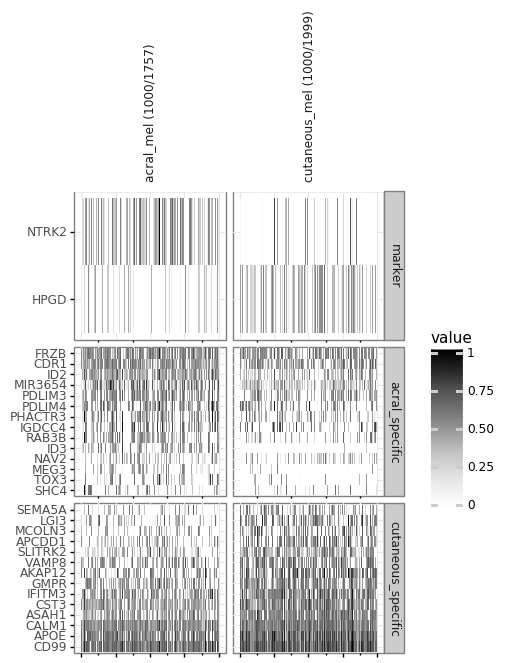

<ggplot: (-9223363265814921535)>


In [4]:
print('computing...')
gene_n = 15
target_set = ['acral_mel']
ref_set = ['cutaneous_mel']
source_groupby = 'class_2'
filter_list = ['A1046M', 'A1038LM', '10WK03', '12WK05', '12WKM01', '18WKM06']
input_adata = full_adata[[x in filter_list for x in full_adata.obs.patient]]

input_adata = input_adata[[x in target_set+ref_set for x in input_adata.obs[source_groupby]]]
input_adata.obs['DE_grouping'] = ['target' if x in target_set \
                            else 'ref' \
                            for x in input_adata.obs[source_groupby]]

genelist_acr = fast_DE(input_adata, clusterOI='target', groupby='DE_grouping', reference='ref', n_genes=100)
genelist_cut = fast_DE(input_adata, clusterOI='ref', groupby='DE_grouping', reference='target', n_genes=100)
gene_order = genelist_acr[:gene_n] + genelist_cut[:gene_n]

input_adata = full_adata[[x in filter_list for x in full_adata.obs.patient]]
n_cells = 1000
groupby = 'class_2'

# extract cell types and genes order
type_order = ['acral_mel',
              'cutaneous_mel',
             ]

cat, exp_df = prepare_dataframe(input_adata,
                 var_names = gene_order,
                 groupby = 'cell')

exp_df = exp_df.apply(lambda x: min_max_scaler(x.values))
exp_df[groupby] = input_adata.obs[groupby].tolist()

compiled_rows = pd.DataFrame()
type_order_revised = []
for x in type_order:
    df_slice = exp_df[exp_df[groupby] == x]
    df_nrow = len(df_slice)
    if df_nrow >= n_cells:
        df_sample = df_slice.sample(n_cells, random_state = 0)
        num_cell = n_cells
    else:
        df_sample = df_slice
        num_cell = df_nrow
    idx_list = [x for x in range(len(df_sample))]
    random.shuffle(idx_list)
    df_sample['idx'] = idx_list
    df_sample[groupby] = f'{x} ({num_cell}/{df_nrow})'
    type_order_revised = type_order_revised + [f'{x} ({num_cell}/{df_nrow})']
    compiled_rows = compiled_rows.append(df_sample)
    
compiled_rows_melt = pd.melt(compiled_rows, id_vars=[groupby,'idx'])
compiled_rows_melt[groupby] = (compiled_rows_melt[groupby]
                                 .astype(str)
                                 .astype(CategoricalDtype(type_order_revised,
                                                          ordered=True
                                                         )
                                        )
                                )

# order genes
compiled_rows_melt['group'] = ['acral_specific' if (x in genelist_acr and x not in ['NTRK2','HPGD',]) \
                               else 'cutaneous_specific' if x not in ['NTRK2','HPGD',] \
                               else 'marker' if x in ['NTRK2','HPGD',] \
                               else 'NA' for x in compiled_rows_melt['variable']]
acr_list = pd.DataFrame(compiled_rows_melt[[x == 'acral_specific' and \
                                            (y.startswith('acral_mel') or y.startswith('acral_mel')) \
                                for x,y in zip(compiled_rows_melt.group,
                                                        compiled_rows_melt[groupby]
                                                       )]]
             .groupby('variable')['value']
             .apply(lambda x: np.mean(x))
             .dropna()
             .reset_index()
             .sort_values('value')
            )['variable'].tolist()
cut_list = pd.DataFrame(compiled_rows_melt[[x == 'cutaneous_specific' and \
                                            (y.startswith('cutaneous_mel') or y.startswith('cutaneous_mel')) \
                                for x,y in zip(compiled_rows_melt.group,
                                                        compiled_rows_melt[groupby]
                                                       )]]
             .groupby('variable')['value']
             .apply(lambda x: np.mean(x))
             .dropna()
             .reset_index()
             .sort_values('value')
            )['variable'].tolist()

compiled_rows_melt['variable'] = (compiled_rows_melt['variable']
                                 .astype(str)
                                 .astype(CategoricalDtype(['HPGD','NTRK2',]+acr_list+cut_list[::-1],
                                                          ordered=True
                                                         )
                                        )
                                )
compiled_rows_melt['group'] = (compiled_rows_melt['group']
                                 .astype(str)
                                 .astype(CategoricalDtype(['marker','acral_specific','cutaneous_specific'],
                                                          ordered=True
                                                         )
                                        )
                                )
compiled_rows_melt = compiled_rows_melt.dropna()


plotnine.options.figure_size = (4,6)
plot = (ggplot(compiled_rows_melt)
      + theme_bw()
      + theme(axis_text_x = element_blank(),
              strip_text_x = element_text(angle = 90, vjust = 0),
              strip_background_x = element_rect(fill = 'white', color = 'white') )
      + geom_tile(aes('idx','variable',fill='value'))
      + facet_grid(f'group~{groupby}', 
                   space = 'free',
                   scales = 'free'
                  )
      + scale_fill_cmap('Greys')#copper
      + labs(x = '', y = '')
       )

print(plot)


In [29]:
# run this to download plot

fn = 'acr_v_cut_heatmap.pdf'
local_dest = f'/home/ubuntu/data/DL20181011_melanocyte_test_data/test_prints/{fn}'
ggsave(plot, local_dest)
s3_dest = 'daniel.le-work/MEL_project/plot_prints/test_prints/'
! aws s3 cp {local_dest} s3://{s3_dest}
! rm local_dest
print('\n', 'download here:', f'https://s3-us-west-2.amazonaws.com/{s3_dest}{fn}')


upload: ../../data/DL20181011_melanocyte_test_data/test_prints/acr_v_cut_heatmap.pdf to s3://daniel.le-work/MEL_project/plot_prints/test_prints/acr_v_cut_heatmap.pdf
rm: cannot remove 'local_dest': No such file or directory

 download here: https://s3-us-west-2.amazonaws.com/daniel.le-work/MEL_project/plot_prints/test_prints/acr_v_cut_heatmap.pdf


# Mels only recluster

In [7]:
if not 'run_recluster' in globals():

    n_pcs = 75
    coi = full_adata[[x in ['cutaneous_mel',
                    'acral_mel',
                    'foreskin_mel',
                    'dark_foll_mel',
                    'light_foll_mel',] for x in full_adata.obs.class_2]].obs.index.tolist()
    raw_adata.obs['recluster'] = [x in coi for x in raw_adata.obs.index]
    adata_subset2 = raw_adata[raw_adata.obs['recluster'] == True]
    adata_subset2 = sc.pp.log1p(adata_subset2, copy=True) # new
    sc.pp.highly_variable_genes(adata_subset2,min_mean=0.1,max_mean=10,min_disp=0.5) # new
    sc.pp.scale(adata_subset2) # new
    sc.tl.pca(adata_subset2, use_highly_variable = True, n_comps=n_pcs) # new
    sc.pp.neighbors(adata_subset2, n_pcs=n_pcs, n_neighbors=100) # new
    sc.tl.umap(adata_subset2, min_dist = 0.5)
    sc.tl.louvain(adata_subset2, resolution = 0.25)

    # add feature labels
    for input_adata in [adata_subset2]:
        input_adata.obs['true_year'] = [float(x.split('WK')[0])/52 if len(x.split('WK')[0]) <= 3 else np.nan for x in input_adata.obs.patient]
        input_adata.obs['true_year'] = [y+(9/12) if np.isnan(x) else x for x,y in zip(input_adata.obs['true_year'], input_adata.obs['age']) ]

        input_adata.obs['dev_stage'] = ['adt' if x > 0 else 'neo' if x == 0 else 'fet' for x in input_adata.obs.age]
        input_adata.obs['subtypes'] = [x if x in ['acral','foreskin'] else 'cutaneous' for x in input_adata.obs.general_location]
        foll_idx = full_adata[[x in ['light_foll_mel','dark_foll_mel'] for x in full_adata.obs.class_2]].obs.index.tolist()
        input_adata.obs['subtypes'] = ['follicular' if x in foll_idx \
                                       else y for x,y in zip(input_adata.obs.index, input_adata.obs['subtypes'])]
        input_adata.obs['acral_subtype'] = [x if x == 'acral' else 'not_acral' for x in input_adata.obs['subtypes']]
        input_adata.obs['foreskin_subtype'] = [x if x == 'foreskin' else 'not_foreskin' for x in input_adata.obs['subtypes']]
        input_adata.obs['follicular_subtype'] = [x if x == 'follicular' else 'not_follicular' for x in input_adata.obs['subtypes']]

        input_adata.obs['dev_subtype'] = [f'{x}_{y}' for x,y in zip(input_adata.obs.dev_stage, input_adata.obs.subtypes)]


        for i in ['dev_stage', 'subtypes', 'acral_subtype' ,'foreskin_subtype','follicular_subtype','dev_subtype']:
            input_adata.obs[i] =  (input_adata
                                     .obs[i]
                                     .astype(str)
                                   .astype(CategoricalDtype(eval(f'{i}_order'), ordered = True))
                                  )
            

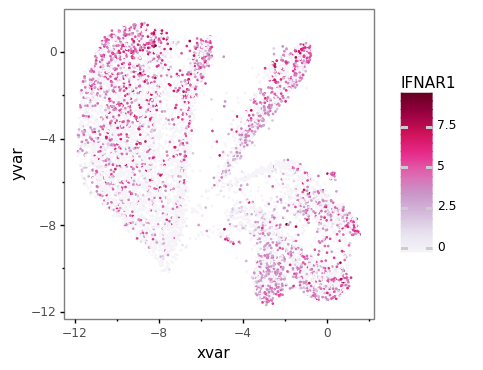

<ggplot: (-9223363264803973772)>


In [43]:
# plot
GOI = 'IFNAR1'

input_adata = adata_subset2
cat, df = prepare_dataframe(input_adata,
                            GOI,
                            'cell'
                           )
umap_df = pd.DataFrame(input_adata.obsm['X_umap'], columns = ['xvar','yvar'])
umap_df[GOI] = df[GOI].values

plotnine.options.figure_size = (4,4)
plot = (ggplot(umap_df)
        + theme_bw()
        + theme(aspect_ratio = 1,
                panel_grid_major = element_blank(), 
                panel_grid_minor = element_blank()
               )
        + geom_point(aes('xvar','yvar',color=GOI), size = 0.1)
        + scale_color_cmap('PuRd') #magma
       )
print(plot)

In [57]:
# run this to download plot

fn = 'mel_only_lookup_umap.pdf'
local_dest = f'/home/ubuntu/data/DL20181011_melanocyte_test_data/test_prints/{fn}'
ggsave(plot, local_dest)
s3_dest = 'daniel.le-work/MEL_project/plot_prints/test_prints/'
! aws s3 cp {local_dest} s3://{s3_dest}
! rm local_dest
print('\n', 'download here:', f'https://s3-us-west-2.amazonaws.com/{s3_dest}{fn}')

upload: ../../data/DL20181011_melanocyte_test_data/test_prints/mel_only_lookup_umap.pdf to s3://daniel.le-work/MEL_project/plot_prints/test_prints/mel_only_lookup_umap.pdf
rm: cannot remove 'local_dest': No such file or directory

 download here: https://s3-us-west-2.amazonaws.com/daniel.le-work/MEL_project/plot_prints/test_prints/mel_only_lookup_umap.pdf


# print requested plots NOT in this notebook

In [14]:
def get_s3path_list(bucket, prefix, suffix):
    #     bucket = 'darmanis-group'
    #     prefix = 'singlecell_lungadeno/rawdata/fastqs'
    #     suffix = 'fastq.gz'

    client = boto3.client('s3')
    paginator = client.get_paginator('list_objects')
    operation_parameters = {'Bucket': bucket,
                            'Prefix': prefix}
    page_iterator = paginator.paginate(**operation_parameters)
    paths = ['s3://{}/{}'.format(bucket, key['Key']) for page in page_iterator for key in page['Contents'] if key['Key'].endswith(suffix)]
    return paths

In [16]:
bucket = 'daniel.le-work'
prefix = 'MEL_project/plot_prints'

full_output = []
for suffix in ['.eps','.svg']:
    full_output = full_output + get_s3path_list(bucket, prefix, suffix)

for f in full_output:
    fn = f.split('s3://')[-1]
    print('download here:', f'https://s3-us-west-2.amazonaws.com/{fn}')

download here: https://s3-us-west-2.amazonaws.com/daniel.le-work/MEL_project/plot_prints/HPGD_box_plot.eps
download here: https://s3-us-west-2.amazonaws.com/daniel.le-work/MEL_project/plot_prints/NTRK2_box_plot.eps
download here: https://s3-us-west-2.amazonaws.com/daniel.le-work/MEL_project/plot_prints/adt_mels_umap.eps
download here: https://s3-us-west-2.amazonaws.com/daniel.le-work/MEL_project/plot_prints/all_cells_heatmap.eps
download here: https://s3-us-west-2.amazonaws.com/daniel.le-work/MEL_project/plot_prints/all_cells_umap.eps
download here: https://s3-us-west-2.amazonaws.com/daniel.le-work/MEL_project/plot_prints/bsc_bar_plot.eps
download here: https://s3-us-west-2.amazonaws.com/daniel.le-work/MEL_project/plot_prints/fet_mels_umap.eps
download here: https://s3-us-west-2.amazonaws.com/daniel.le-work/MEL_project/plot_prints/neo_mels_umap.eps
download here: https://s3-us-west-2.amazonaws.com/daniel.le-work/MEL_project/plot_prints/test_prints/acr_v_cut_heatmap.eps
download here: h

# compare mouse melanoblast

...


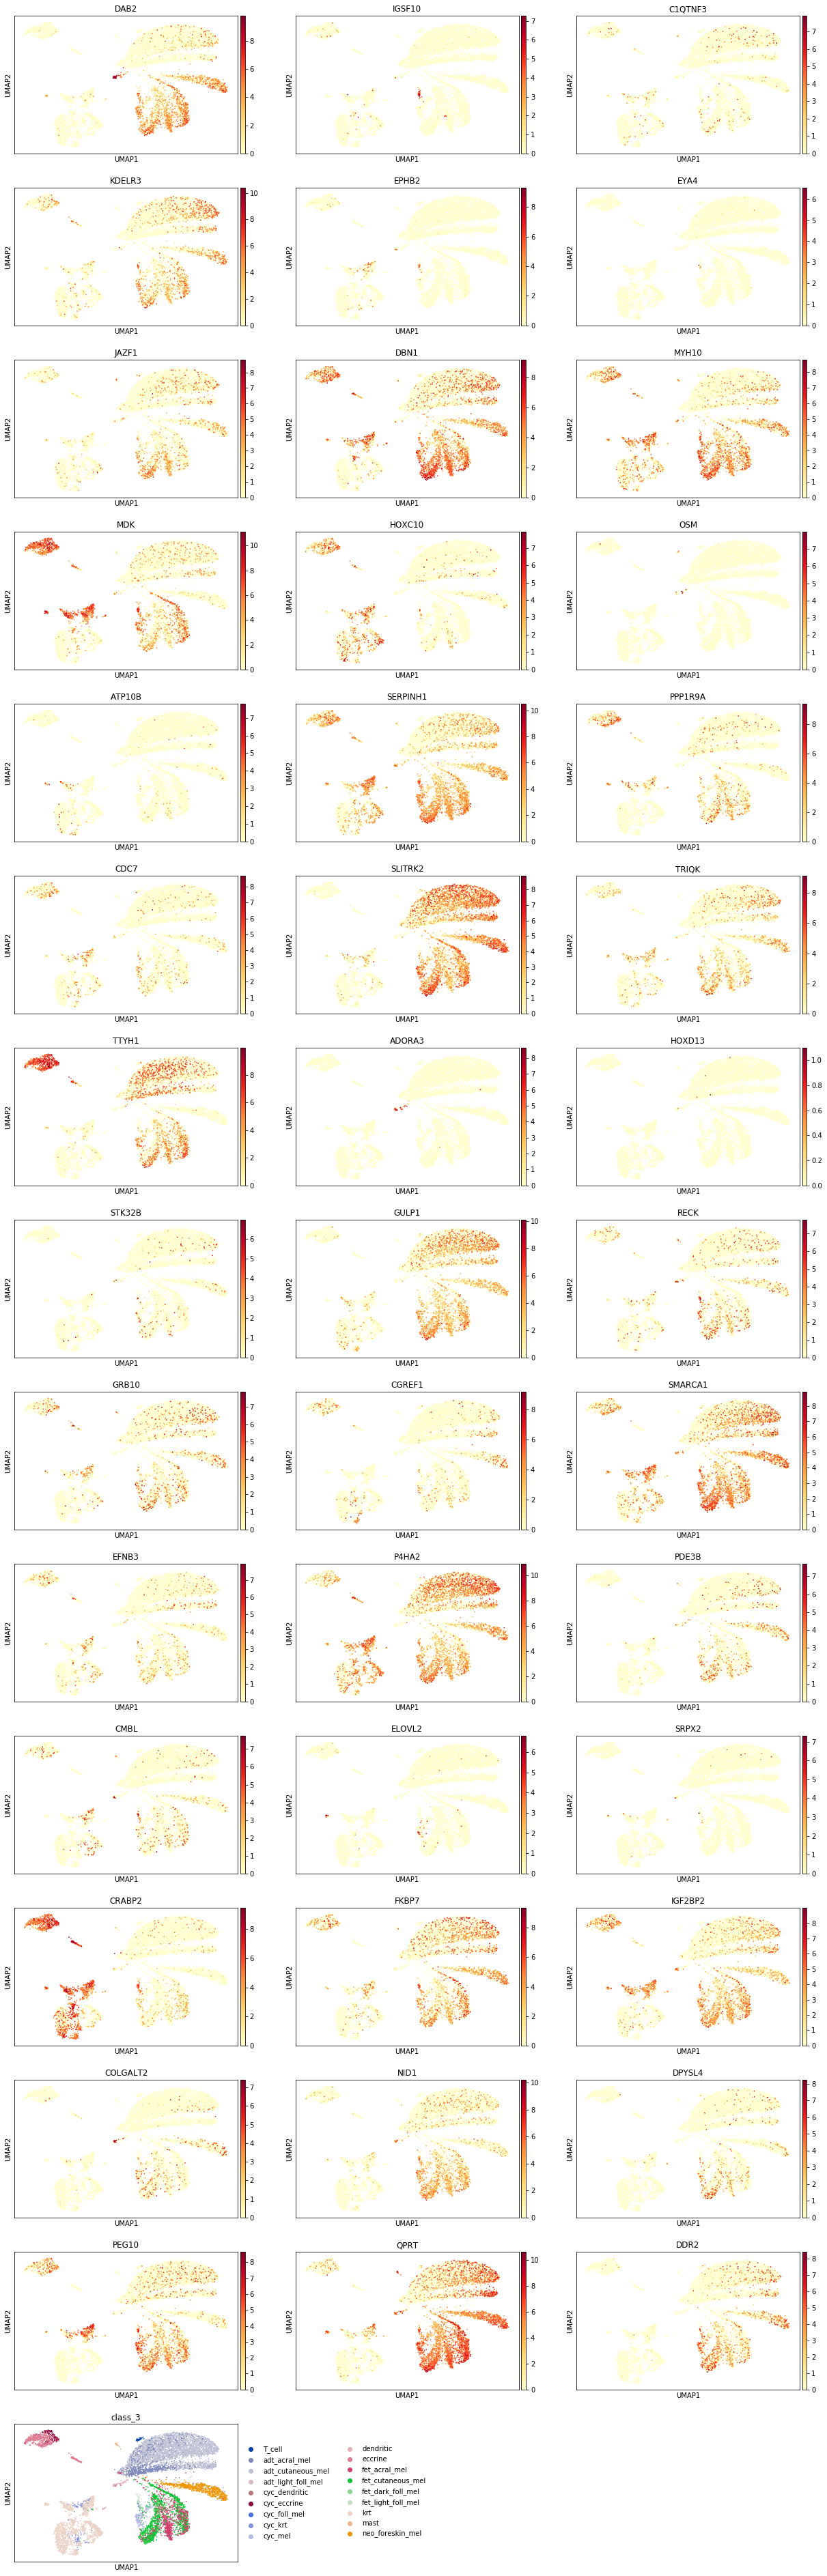

In [18]:
print('...')
# mouse data
# source = https://www.biorxiv.org/content/10.1101/721712v1
# converter = https://www.syngoportal.org/convert.html
mouse_sym = pd.read_csv('s3://daniel.le-work/MEL_project/DL20191003_mouse2house.csv')
mouse_sym = mouse_sym['query'].tolist()
mouse_sym = list(set(mouse_sym) & set(full_adata.var_names))
sc.pl.umap(full_adata, color=mouse_sym+['class_3'], cmap='YlOrRd', ncols=3)

...


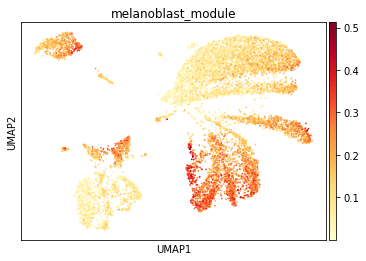

In [19]:
print('...')
input_adata = full_adata
cat, exp_df = prepare_dataframe(input_adata,
                     var_names = input_adata.var_names,
                     groupby = 'cell')
exp_df = exp_df.rank(pct=True, axis=1, method = 'min') # ranked expression per cell
input_adata.obs['melanoblast_module'] = exp_df.loc[:,mouse_sym].mean(axis=1)

sc.pl.umap(input_adata, color='melanoblast_module', cmap='YlOrRd')